# **San Francisco Crime Analysis**

## **Description:**

Crime analysis and prediction in San Francisco is a complex and challenging task. Crime is a complex phenomenon with many contributing factors, including social, economic, and environmental factors. It is also difficult to predict crime because it is often random and unpredictable.

However, there are a number of ways to analyze and predict crime in San Francisco. One common approach is to use historical crime data to identify patterns and trends. This data can be used to identify high-crime areas and times of day, as well as the types of crimes that are most common in different neighborhoods.

Another approach to crime analysis is to use predictive analytics. Predictive analytics is a set of techniques that use historical data to predict future events. In the context of crime prediction, predictive analytics can be used to predict the likelihood of a crime occurring in a particular location at a particular time.

There are a number of different predictive analytics techniques that can be used to predict crime. Some of the most common techniques include:

* **Regression analysis:** Regression analysis is a statistical technique that can be used to identify the relationship between different variables. In the context of crime prediction, regression analysis can be used to identify the factors that are most associated with crime, such as poverty, unemployment, and the presence of gangs.
* **Decision trees:** Decision trees are a type of machine learning algorithm that can be used to classify data. In the context of crime prediction, decision trees can be used to classify neighborhoods as high-crime or low-crime based on their characteristics, such as poverty, unemployment, and the presence of gangs.
* **Random forests:** Random forests are a type of machine learning algorithm that is similar to decision trees, but instead of using a single decision tree, random forests use a large number of decision trees to make predictions. This makes random forests more accurate and less prone to overfitting than decision trees.

Predictive analytics models can be used to help the San Francisco Police Department (SFPD) allocate resources more effectively and prevent crime from happening in the first place. For example, the SFPD can use predictive analytics models to identify high-crime areas and times of day, and then deploy more officers to those areas during those times. The SFPD can also use predictive analytics models to identify individuals who are at high risk of committing crimes, and then intervene to prevent those crimes from happening.

It is important to note that crime prediction is not perfect. No predictive analytics model can accurately predict crime with 100% accuracy. However, predictive analytics models can be a valuable tool for helping the SFPD reduce crime in San Francisco.

Here are some examples of how crime analysis and prediction are being used in San Francisco:

* The SFPD is using predictive analytics models to identify high-crime areas and times of day. This information is being used to deploy more officers to those areas during those times.
* The SFPD is also using predictive analytics models to identify individuals who are at high risk of committing crimes. This information is being used to intervene to prevent those crimes from happening.
* The SFPD is working with researchers at the University of California, Berkeley to develop a new crime prediction model that uses social media data. This model is still under development, but it has the potential to be more accurate than existing crime prediction models.

Crime analysis and prediction is a complex and challenging field, but it has the potential to make a significant impact on reducing crime in San Francisco.

# Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium # To create interactive maps
import squarify # used to create treemaps

In [45]:
import warnings
warnings.filterwarnings('ignore')

# Reading Datasets

In [17]:
data=pd.read_csv('crime.csv')
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


### The Datasets Information:
[DataSets Link (Click Me)](https://thecleverprogrammer.com/wp-content/uploads/2020/05/crime.csv)

The San Francisco crime dataset is a collection of crime reports from the San Francisco Police Department (SFPD). The dataset contains nearly 12 years of crime reports from all of San Francisco's neighborhoods.

The following are the features of the San Francisco crime dataset:

* **Dates:** The timestamp of the crime incident.
* **Category:** The category of the crime incident. This is the target variable for the dataset.
* **Descript:** A detailed description of the crime incident.
* **DayOfWeek:** The day of the week on which the crime occurred.
* **PdDistrict:** The name of the Police Department District in which the crime occurred.
* **Resolution:** The resolution of the crime incident.
* **Address:** The approximate street address of the crime incident.
* **X:** The longitude of the crime incident.
* **Y:** The latitude of the crime incident.

The categories of crime in the dataset are:

* Assault
* Battery
* Burglary
* Drug/Alcohol
* Fraud
* Larceny/Theft
* Miscellaneous
* Narcotics
* Robbery
* Sex Crimes
* Vehicle Theft


# Data Exploration

* Let's check duplicate data

In [28]:
data.duplicated().sum()

0

In [18]:
data.shape

(150500, 13)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [20]:
data.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


* Checking if any null value presents

In [21]:
data.isnull()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,False,False,False,False,False,False,False,False,False,False,False,False,False
150496,False,False,False,False,False,False,False,False,False,False,False,False,False
150497,False,False,False,False,False,False,False,False,False,False,False,False,False
150498,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [23]:
data.isnull().sum().sum()

1

* One null value present 
* let's fill their mode value

In [24]:
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace=True)

In [25]:
data.isnull().sum().sum()

0

# Data Visualization

In [26]:
plt.style.use('dark_background')

* First thing we are going to find category of crime

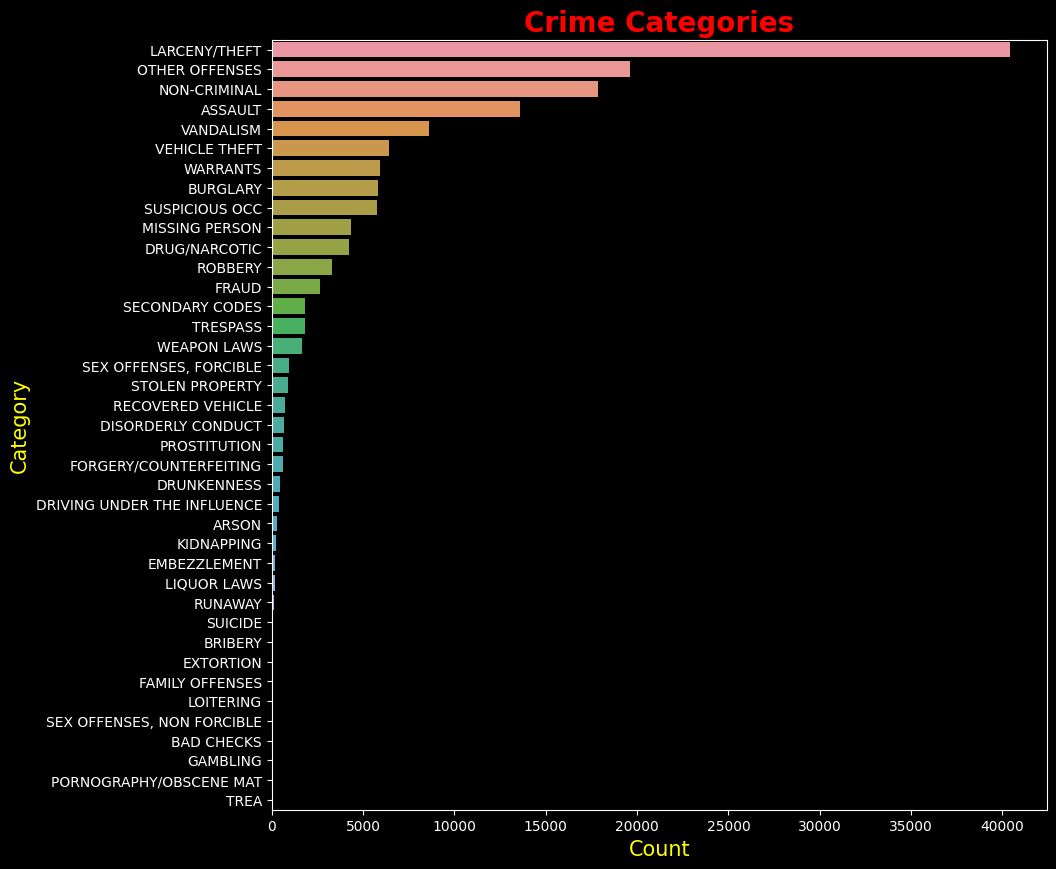

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Category'], order=data['Category'].value_counts().index)
plt.title('Crime Categories', fontweight='bold', fontsize=20,color='red')
plt.xlabel('Count', fontsize=15, color='yellow')
plt.ylabel('Category', fontsize=15, color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

* Let's draw tree map of a crime category

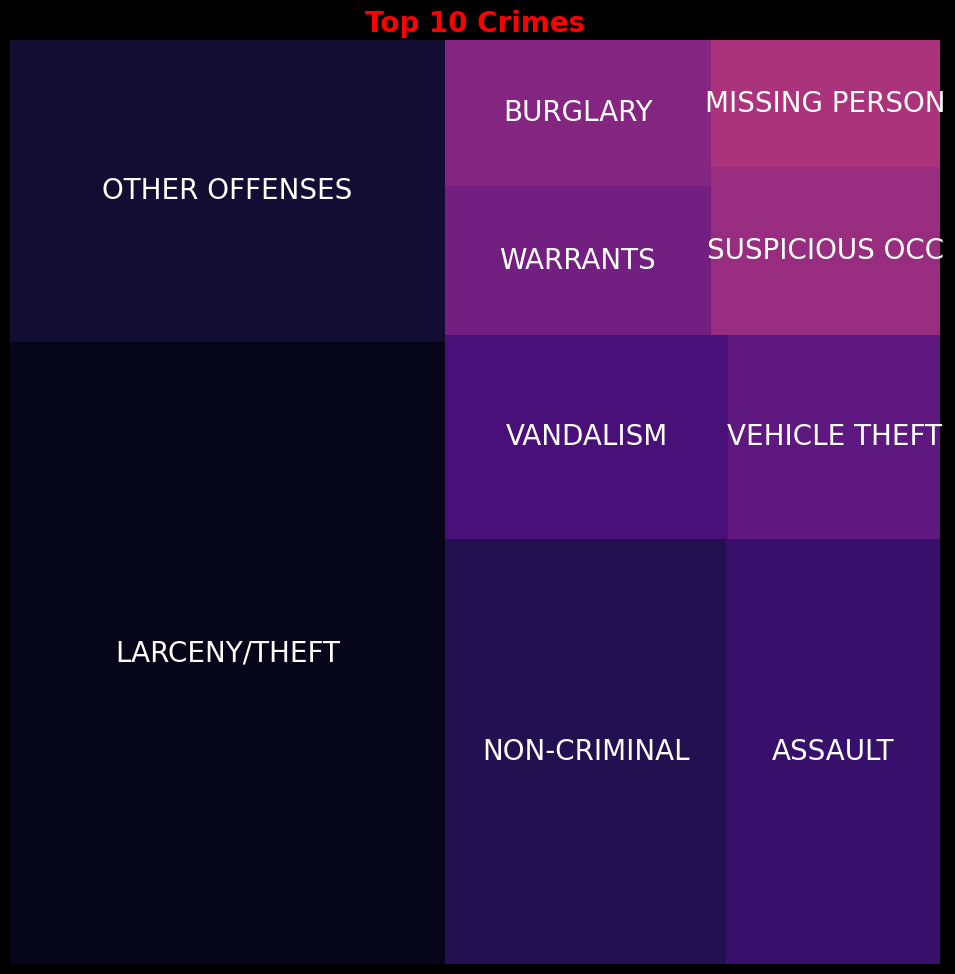

In [34]:
y=data['Category'].value_counts().head(10)
plt.figure(figsize=(12,12))
squarify.plot(sizes=y.values,label=y.index,color=sns.color_palette('magma',20))
plt.rcParams.update({'font.size':20})
plt.axis('off')
plt.title('Top 10 Crimes', fontweight='bold', fontsize=20,color='red')
plt.show()

* We can observe description of crime using `WordCloud`

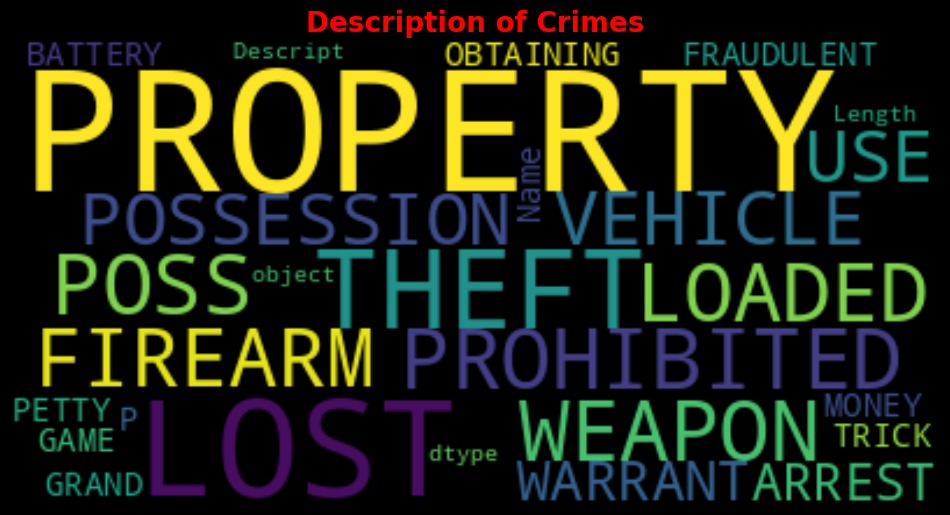

In [36]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(12,12))
wc=WordCloud(background_color='black',max_words=100)
wc.generate(str(data['Descript']))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Description of Crimes',fontsize=20, fontweight='bold',color='red')
plt.show()

* Let's check in which District with most crime 

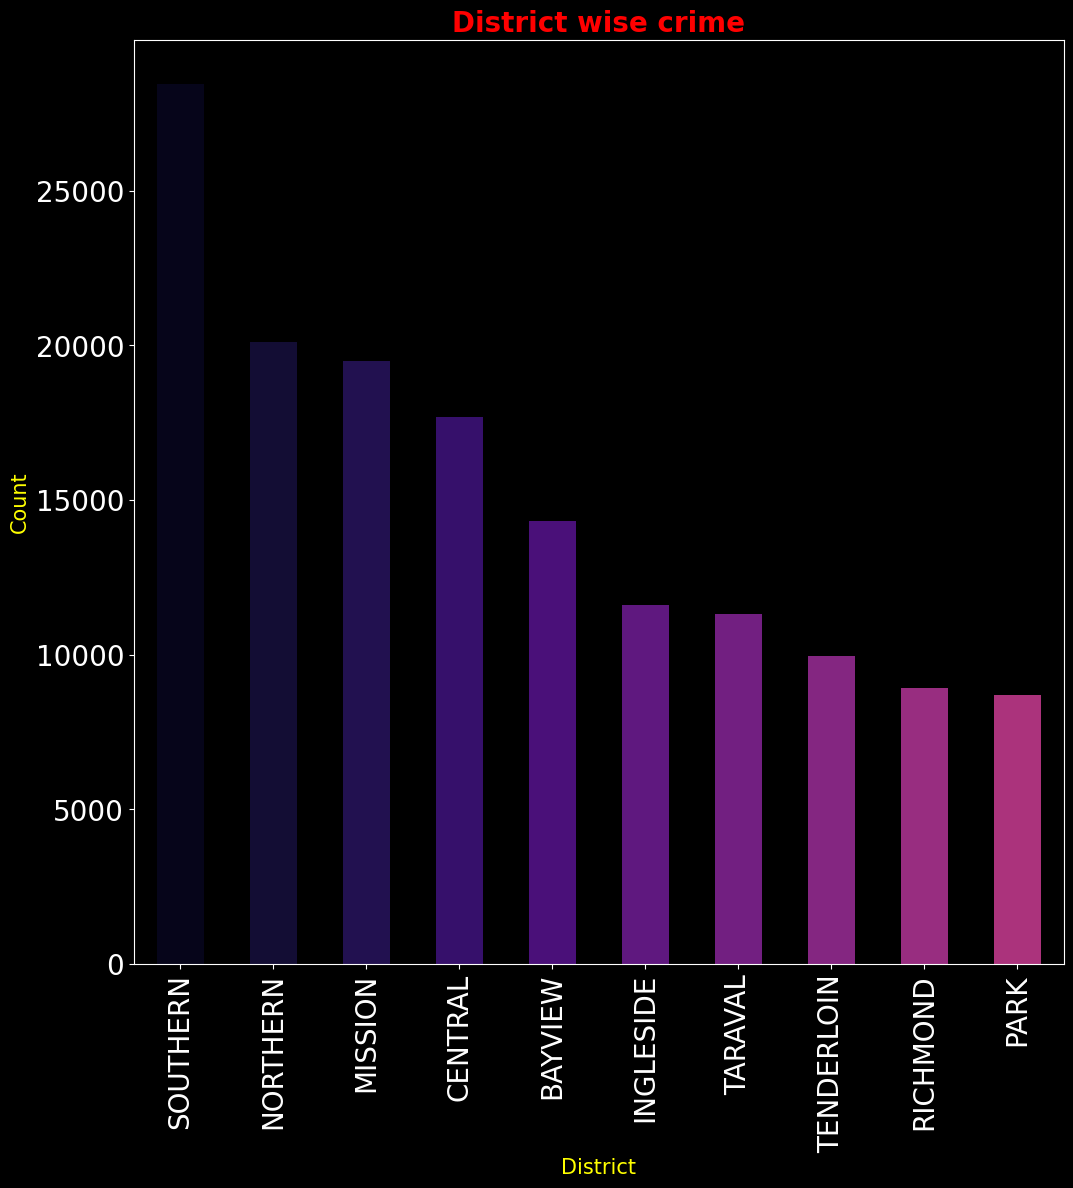

In [38]:
plt.figure(figsize=(12,12))
data['PdDistrict'].value_counts().plot(kind='bar',color=sns.color_palette('magma',20))
plt.xlabel('District', fontsize=15, color='yellow')
plt.ylabel('Count', fontsize=15, color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('District wise crime', fontweight='bold', fontsize=20,color='red')
plt.show()

* I want to know in which area ('Addresses') crime occuring most

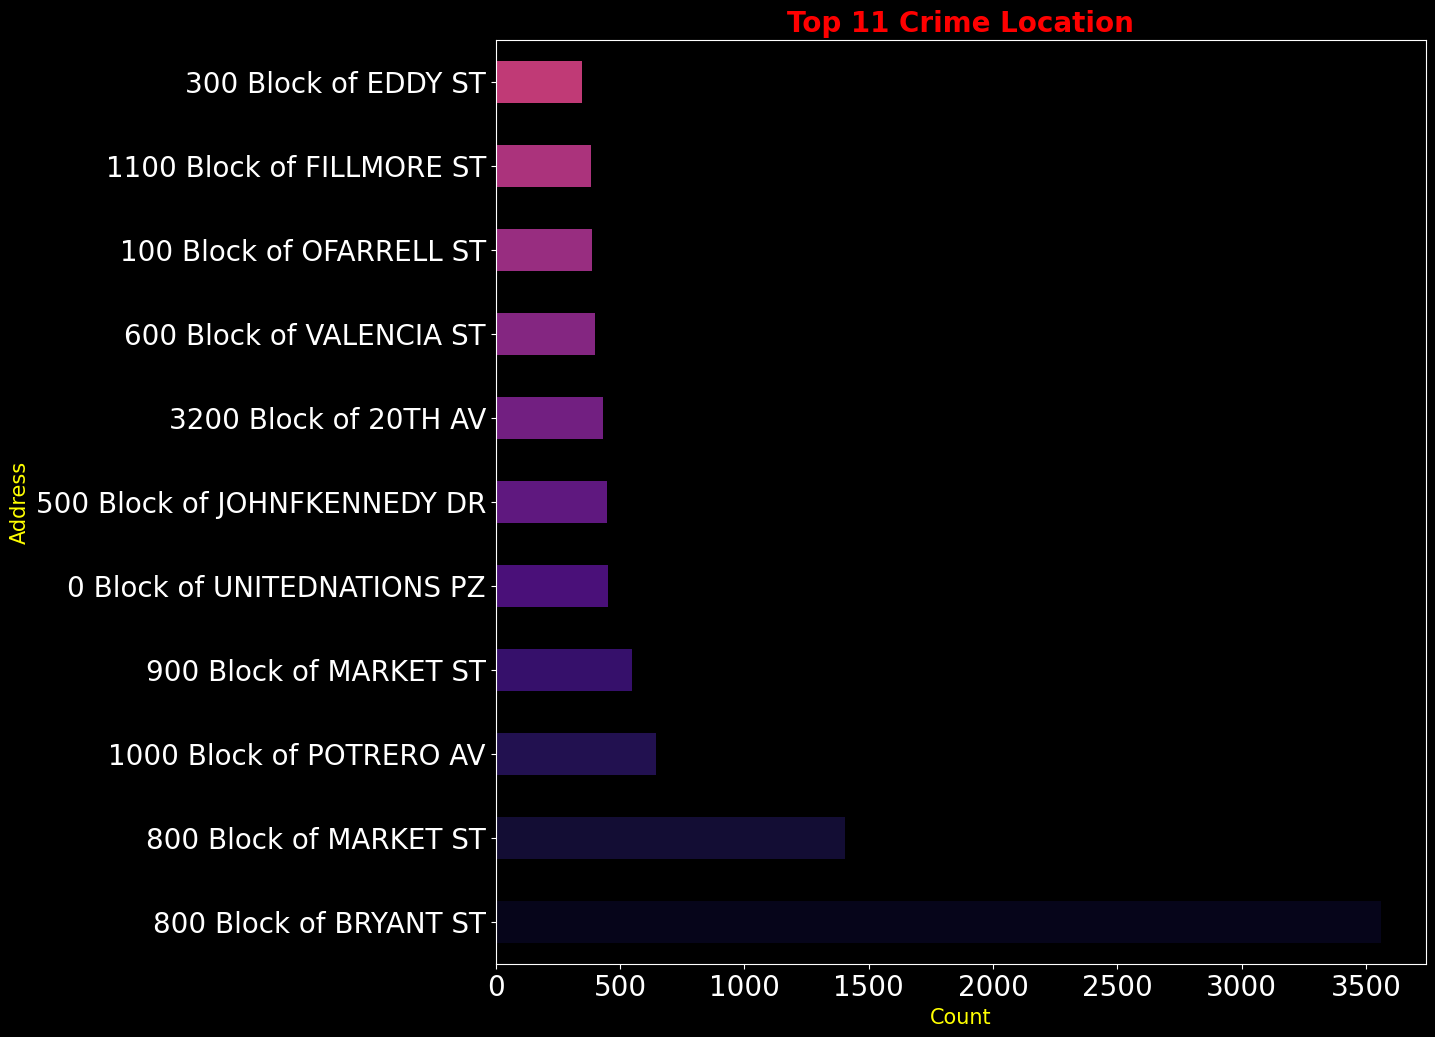

In [41]:
plt.figure(figsize=(12,12))
data['Address'].value_counts().head(11).plot(kind='barh',color=sns.color_palette('magma',20))
plt.xlabel('Count', fontsize=15, color='yellow')
plt.ylabel('Address', fontsize=15, color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Top 11 Crime Location', fontweight='bold', fontsize=20,color='red')
plt.show()

* Which day of weak crime occuring most?

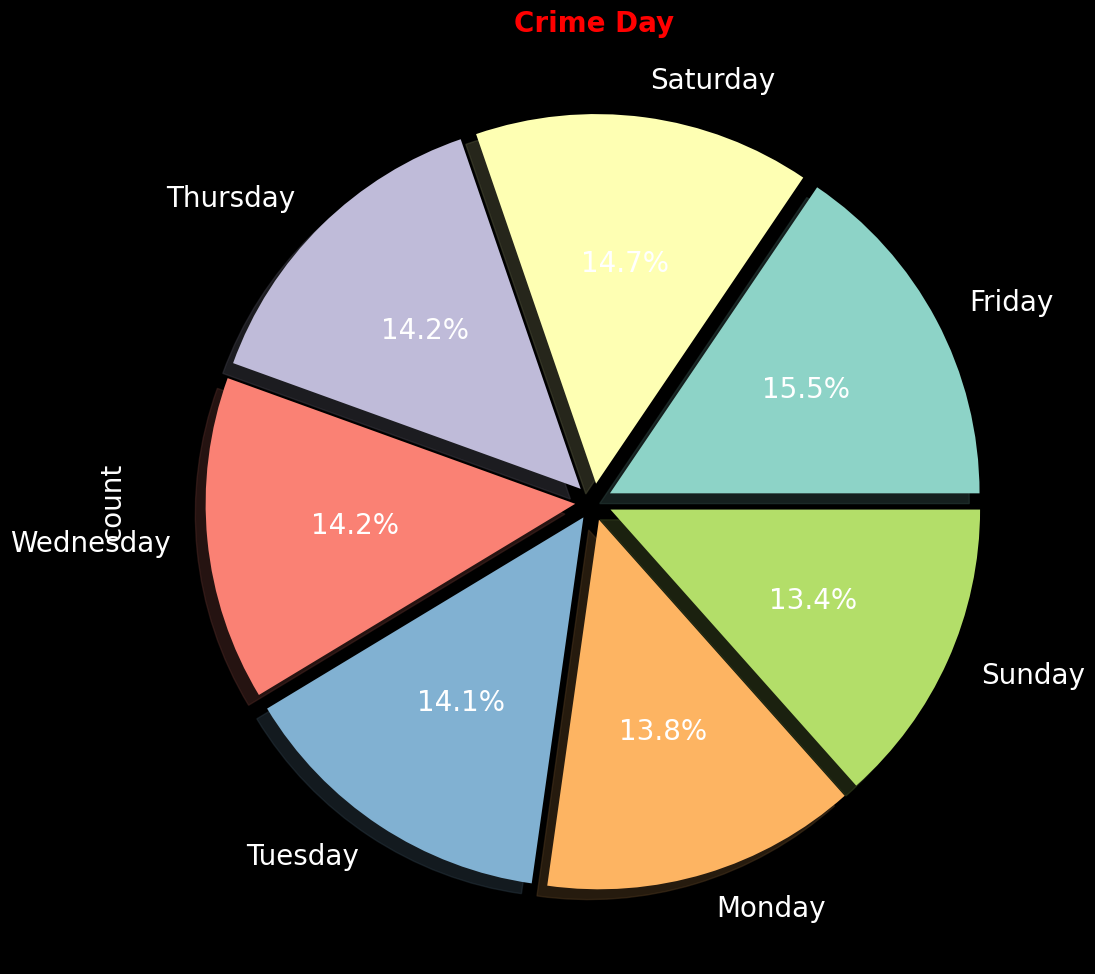

In [43]:
plt.figure(figsize=(12,12))
data['DayOfWeek'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.title('Crime Day', fontweight='bold', fontsize=20,color='red')
plt.show()

* **I think friday is wrost day for `San Francisco`**

* Yes! Now time for month after day 

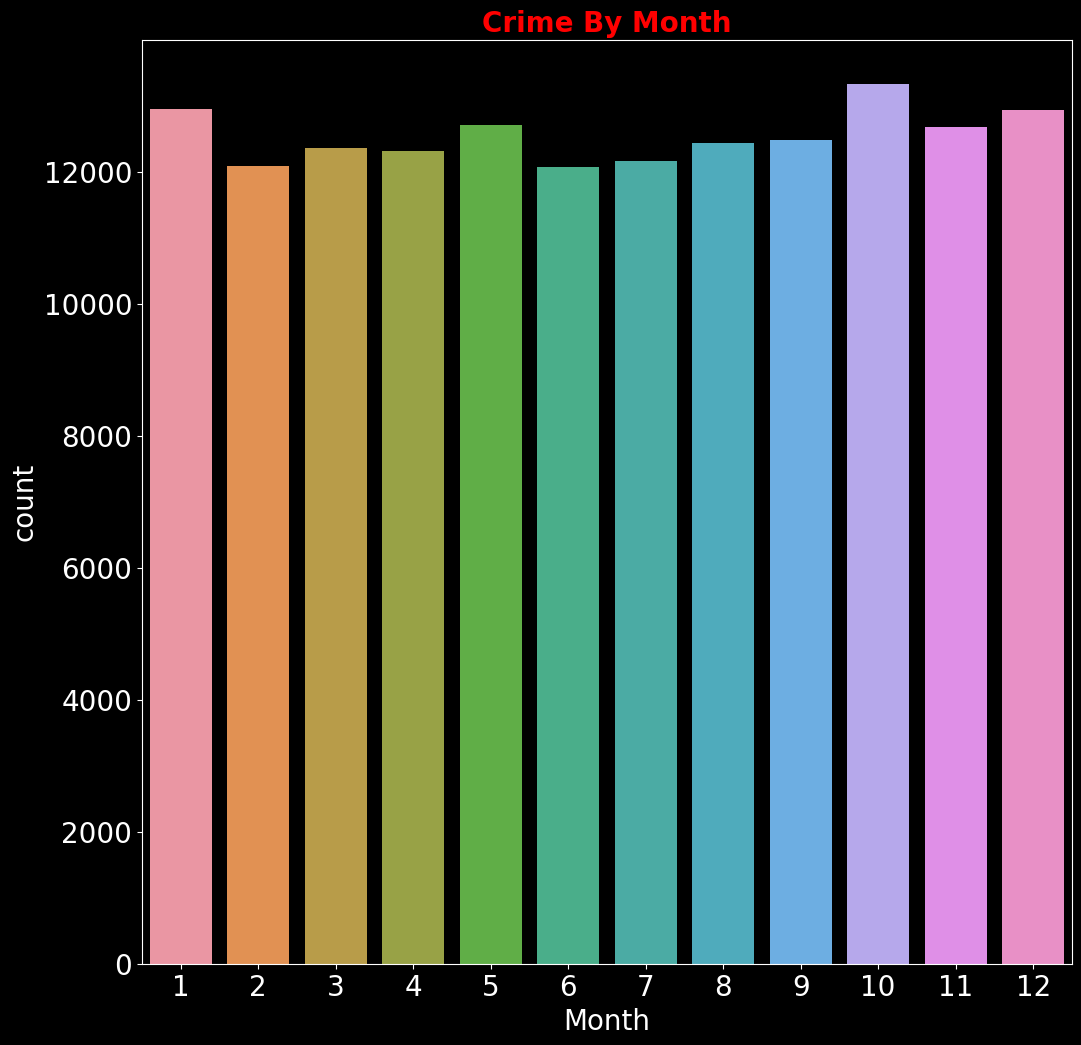

In [46]:
plt.figure(figsize=(12,12))
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
sns.countplot(x='Month',data=data)
plt.title('Crime By Month', fontweight='bold', fontsize=20,color='red')
plt.show()

* Which time crime occurs mostly?

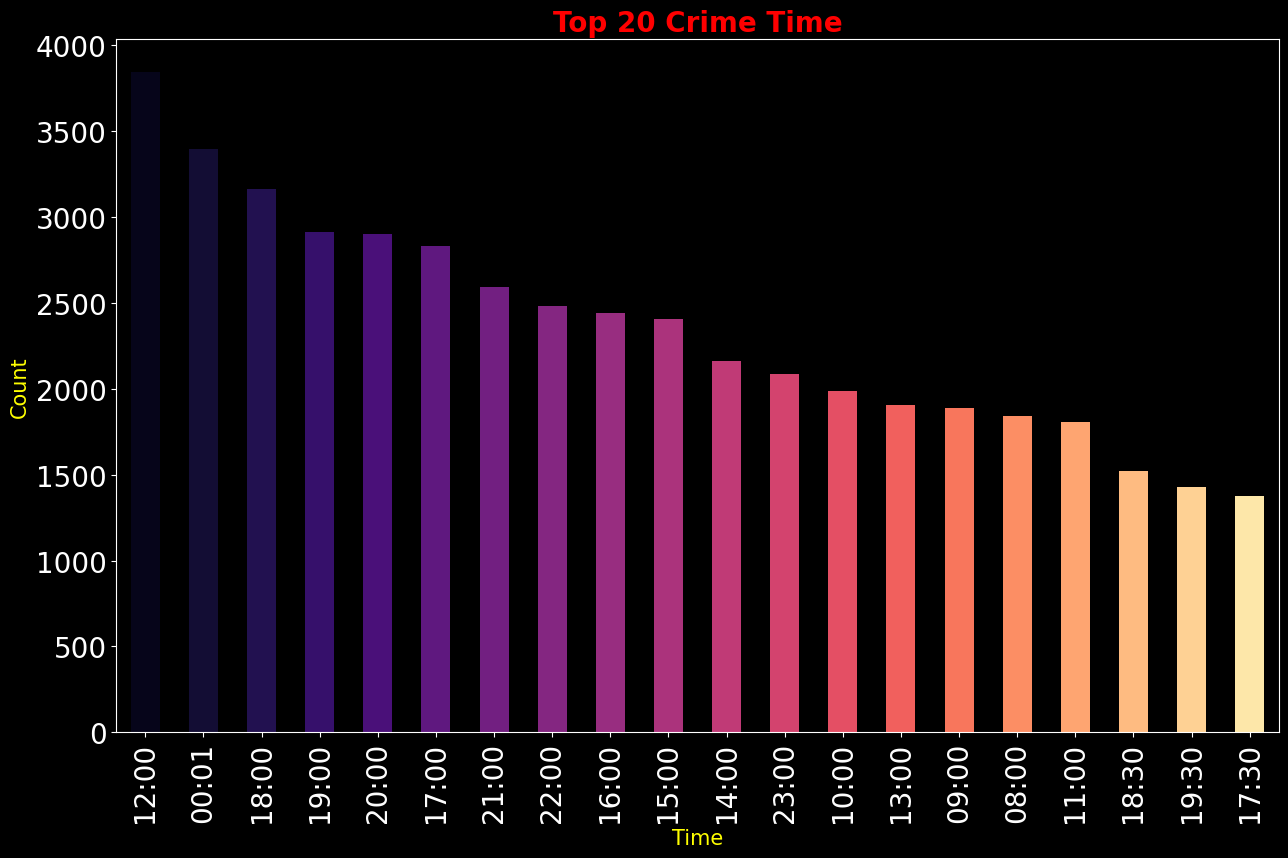

In [48]:
plt.figure(figsize=(15,9))
data['Time'].value_counts().head(20).plot(kind='bar',color=sns.color_palette('magma',20))
plt.xlabel('Time', fontsize=15, color='yellow')
plt.ylabel('Count', fontsize=15, color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Top 20 Crime Time', fontweight='bold', fontsize=20,color='red')
plt.show()

* Time for cross showdown

#### District vs Category of crime

In [49]:
df=data.groupby(['PdDistrict','Category']).size().reset_index(name='Count')
df=df.pivot(index='PdDistrict',columns='Category',values='Count')
df.reset_index(inplace=True)
df.fillna(0,inplace=True)
df.head()


Category,PdDistrict,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,BAYVIEW,71.0,1775.0,4.0,20.0,521.0,49.0,27.0,327.0,27.0,...,2.0,59.0,4.0,610.0,0.0,125.0,1059.0,1081.0,548.0,306.0
1,CENTRAL,29.0,1187.0,3.0,3.0,645.0,32.0,31.0,207.0,52.0,...,0.0,156.0,10.0,580.0,0.0,173.0,1148.0,481.0,489.0,122.0
2,INGLESIDE,22.0,1506.0,2.0,8.0,534.0,14.0,32.0,191.0,18.0,...,3.0,56.0,16.0,527.0,1.0,74.0,761.0,915.0,307.0,157.0
3,MISSION,46.0,2110.0,2.0,10.0,793.0,171.0,61.0,639.0,101.0,...,3.0,104.0,3.0,945.0,0.0,412.0,1091.0,932.0,1073.0,278.0
4,NORTHERN,27.0,1536.0,4.0,4.0,803.0,124.0,41.0,527.0,59.0,...,3.0,123.0,14.0,600.0,0.0,268.0,1199.0,739.0,624.0,131.0


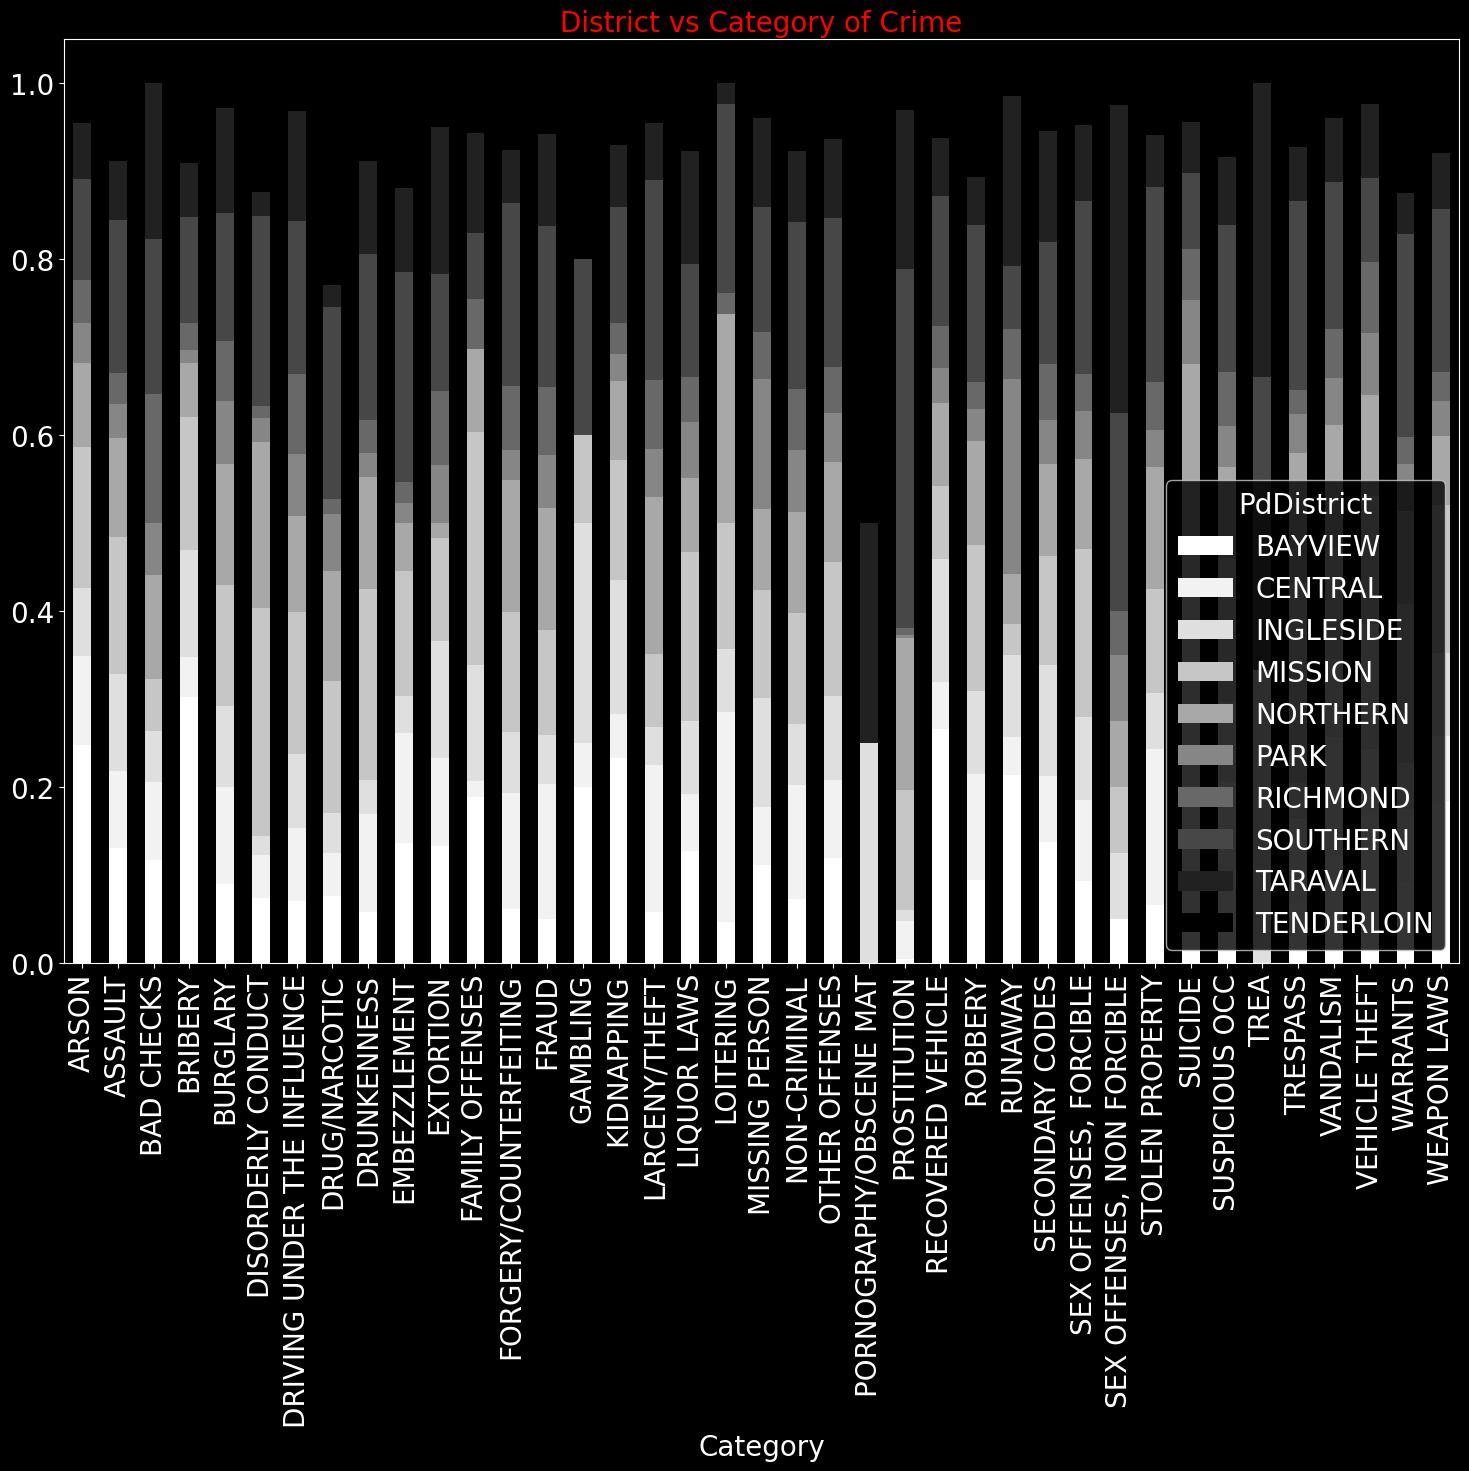

In [53]:
df = pd.crosstab(data['Category'], data['PdDistrict'])
color = plt.cm.Greys(np.linspace(0, 1, 10))

df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20, color = 'red')

plt.xticks(rotation = 90)
plt.show()

### Geographical Visulization

In [ ]:
crimes=data['Category'].unique().tolist()
crimes.remove('TREA')


In [68]:
# Create a base map centered on San Francisco
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

# Add markers for each incident
for index, row in data.iterrows():
    folium.Marker([row['Y'], row['X']], tooltip=row['Category']).add_to(sf_map)

# Display the map
sf_map.save('sf_crime_map.html')


In [59]:
t = data.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,PdDistrict,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [60]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

### Dessity of crime in `San Francisco`

In [65]:
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['PdDistrict', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

# Reference

[Aman Kharwal](https://amankharwal.medium.com/)

[thecleverprogrammer.com](https://thecleverprogrammer.com/)

# Thank You!